# explore : virtual caliper
https://virtualcaliper.is.tue.mpg.de/download.php 

In [14]:
# change weight and get the results. see if the change is linear; for male model
#prompt used : "read these 10 numbers and given them as python list"

import torch 


height = 1.646
weights = [28.00, 36.34, 46.07, 70.00,90.00,110.00]

F_betas =[ 
          [-0.49377, 3.62397, -0.46432, -0.33012, 0.40381, -0.61856, 0.30638, -0.02110, -0.00264, 0.03870],
          [-0.36087, 2.64858, -0.33935, -0.24127, 0.29512, -0.45207, 0.22392, -0.01542, -0.00193, 0.02828],
          [-0.22815, 1.67448, -0.21454, -0.15253, 0.18658, -0.28581, 0.14157, -0.00975, -0.00122, 0.01788],
          [0.03553, -0.026080, 0.03341, 0.02376, -0.02906, 0.04451, -0.02205, 0.00152, 0.00019, -0.00278],
          [0.21398, -1.57049, 0.20122, 0.14306, -0.17500, 0.26806, -0.13277, 0.00914, 0.00115, -0.01677],
          [0.36820, -2.70237, 0.34624, 0.24617, -0.30112, 0.46125, -0.22847, 0.01573, 0.00197, -0.02886],


]

M_betas = [ [2.29564, 3.89493, -0.62347, 0.14782, -0.43548, -0.93687, 0.26099, -0.13743, 0.02980, 0.36058],
           [2.14841, 2.78522, -0.53362, 0.11760, -0.29652, -0.69081, 0.19203, -0.11472, 0.03132, 0.26120],
           [1.99975, 1.66471, -0.44289, 0.08708, -0.15620, -0.44235, 0.12239, -0.09178, 0.03286, 0.16085],
           [1.70101, -0.58696, -0.26056, 0.02576, 0.12576, 0.05694, -0.01753, -0.04568, 0.03595, -0.04079],
           [1.49707, -2.12416, -0.13609, -0.01610, 0.31826, 0.39779, -0.11306, -0.01421, 0.03805, -0.17845],
           [1.32000, -3.45875, -0.02803, -0.05244, 0.48538, 0.69372, -0.19599, 0.01311, 0.03988, -0.29797]

]

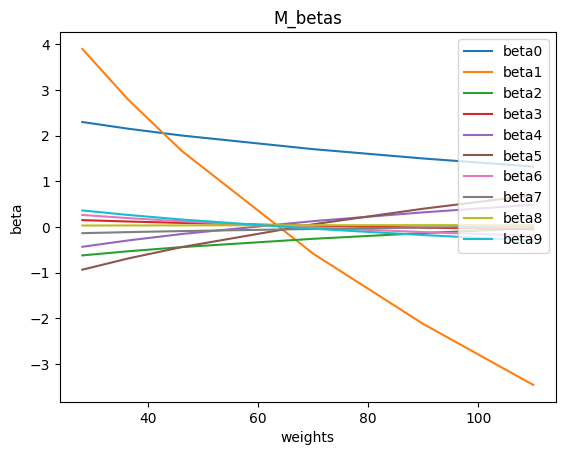

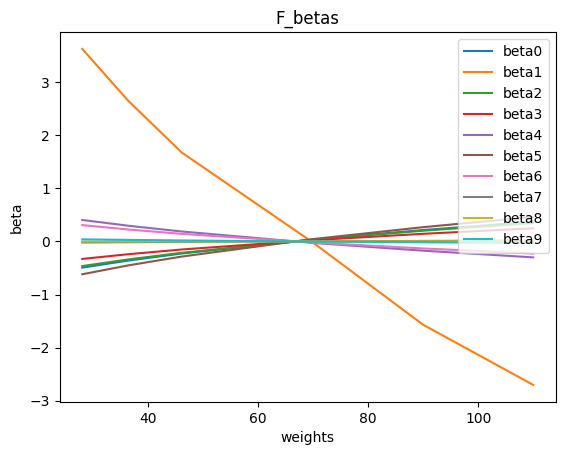

In [18]:
#plot each element of beta with the weight
# each element of beta is a function of weight.
import matplotlib.pyplot as plt
def plot_beta(weights, betas,title=""):
    n = len(weights)
    
    
    # give label to each element of beta
    for i in range(len(betas[0])):
        y = [betas[j][i] for j in range(n)]
        plt.plot(weights, y, label=f"beta{i}")
    plt.xlabel("weights")
    plt.ylabel("beta")
    plt.title(title)
    plt.legend()
    plt.show()
    
    
plot_beta(weights, M_betas,title="M_betas")
plot_beta(weights, F_betas,title="F_betas")

In [19]:
# change them to tensor
F_betas = torch.tensor(F_betas)
M_betas = torch.tensor(M_betas)

weights = torch.tensor(weights)


In [20]:
# see if the change is linear with the weight

# for F_betas

normalized_slopes = []
slopes = []

for i in range(len(weights)-1):
    diff = F_betas[i+1] - F_betas[i]
    weight_diff = weights[i+1] - weights[i]
    slope = diff/weight_diff
    # print(slope)
    
    slopes.append(slope)
    #normalize the slope
    slope = slope/slope[0]
    normalized_slopes.append(slope)
    


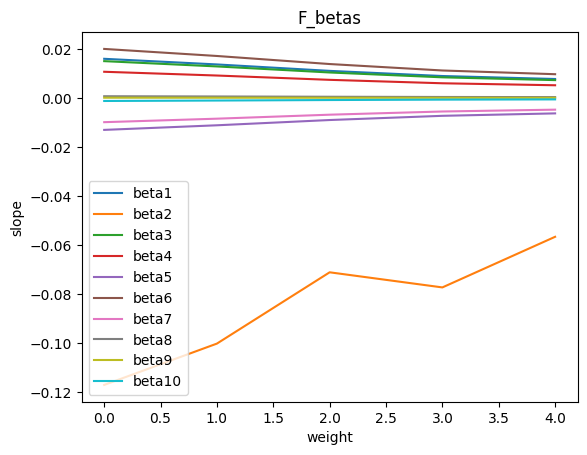

In [21]:
#plot slopes with weight 
import matplotlib.pyplot as plt

for i in range(len(slopes[0])):
    plt.plot(range(len(slopes)), [slope[i] for slope in slopes], label = f'beta{i+1}')
plt.legend()
plt.xlabel('weight')
plt.ylabel('slope')
plt.title('F_betas')
plt.show()

In [25]:
# slopes between weights 46.07 , 90.00 ( indices 2,4)
Male_slope = M_betas[4] - M_betas[2]
Female_slope = F_betas[4] - F_betas[2]
weight_diff = weights[4] - weights[2]

print(f"{weight_diff} kgs of weight difference")
print(f"Male slope     {Male_slope}")
print(f"female slope   {Female_slope}")

43.93000030517578 kgs of weight difference
Male slope     tensor([-0.5027, -3.7889,  0.3068, -0.1032,  0.4745,  0.8401, -0.2354,  0.0776,
         0.0052, -0.3393])
female slope   tensor([ 4.4213e-01, -3.2450e+00,  4.1576e-01,  2.9559e-01, -3.6158e-01,
         5.5387e-01, -2.7434e-01,  1.8890e-02,  2.3700e-03, -3.4650e-02])


In [26]:
# difference between male and female 
Male_slope - Female_slope

tensor([-0.9448, -0.5439, -0.1090, -0.3988,  0.8360,  0.2863,  0.0389,  0.0587,
         0.0028, -0.3047])